<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [ ]:
!nvidia-smi

Tue Oct 15 10:08:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Install TensorFlow and TensorFlow Model Garden

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.17.0


In [ ]:
!pip install -q tensorflow==2.17.0

In [ ]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 505), reused 1389 (delta 306), pack-reused 0 (from 0)
Receiving objects: 100% (2650/2650), 34.02 MiB | 16.82 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Note: switching to '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 104.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.1/239.1 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 116.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the p

## Restart the Runtime

**Note**
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download Dataset

In [ ]:
!pip install emoji
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 37.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
# from official.nlp import optimization
from sklearn.preprocessing import LabelEncoder
import emoji
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.17.0
Eager mode:  True
Hub version:  0.16.1
GPU is available


In [ ]:
# You need to use the raw URL from GitHub instead of the regular URL.
github_url = "https://raw.githubusercontent.com/pandapanda3/Dataset_Machine_Learning/refs/heads/main/PhoneReviewsDataset/opinion_mining_dataset.csv"
df = pd.read_csv(github_url, sep=',', skipinitialspace=True, on_bad_lines='skip')
df.shape

(1373, 3)

In [ ]:
# remove | and space
df_remove_noise = df.applymap(lambda x: x.replace('|', '').strip())
df_remove_noise

<ipython-input-9-3f60c086b9e9>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_remove_noise = df.applymap(lambda x: x.replace('|', '').strip())


,| Sentence,NER Tag,Class |
0,Bought a Huawei P30 Pro and found the camera t...,"Product, Part",Positive
1,My friend plans to fix his old Huawei P20 phone.,Product,Neutral
2,Mic of that phone easily goes faulty.,Part,Negative
3,The battery life of my iPhone XR is amazing!,"Product, Part",Positive
4,I can't stand the slow performance of my Samsu...,"Product, Part",Negative
...,...,...,...
1368,Loving the new design of the OnePlus Nord N10 ...,Product,Positive
1369,The battery life of the Google Pixel 4a 5G is ...,"Product, Part",Positive
1370,The camera settings on the Vivo X50 Pro are co...,"Product, Part",Negative
1371,The sound quality of the Huawei Mate 40 Pro is...,"Product, Part",Positive


In [ ]:
df_update_column=df_remove_noise.rename(columns={'| Sentence                                                     ': 'Sentence', 'NER Tag        ': 'NER Tag', 'Class    |': 'Class'})
# Gets the number of duplicates for each data
df_update_column[df_update_column.duplicated(keep=False)].groupby(list(df_update_column.columns)).size().reset_index(name='count')
# drop the duplicate data
df_drop_duplicate = df_update_column.drop_duplicates(subset=['Sentence'])


In [ ]:
def analyze_noise_in_sentence(sentence):
    # Count the number of symbols and special characters in a sentence
    symbols_count = len(re.findall(r'[!@#$%^&*(),.?":{}|<>]', sentence))
    # Count the number of emojis in a sentence:
    # \w: Do not matches any alphanumeric character
    # \s: Matches any whitespace characters (Spaces, tabs, newlines, etc.)
    # emoji_count = len(re.findall(r'[^\w\s,]', sentence))
    emoji_count = sum(1 for char in sentence if emoji.is_emoji(char))
    return symbols_count, emoji_count

df_drop_duplicate['Symbols Count'], df_drop_duplicate['Emoji Count'] = zip(*df_drop_duplicate['Sentence'].apply(analyze_noise_in_sentence))

<ipython-input-11-1bb8c3885c21>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_duplicate['Symbols Count'], df_drop_duplicate['Emoji Count'] = zip(*df_drop_duplicate['Sentence'].apply(analyze_noise_in_sentence))
<ipython-input-11-1bb8c3885c21>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_duplicate['Symbols Count'], df_drop_duplicate['Emoji Count'] = zip(*df_drop_duplicate['Sentence'].apply(analyze_noise_in_sentence))


In [ ]:
# Define the valid categories for Class and NER Tag columns
valid_class = ["Positive", "Neutral", "Negative"]
valid_ner_tags = ["Product", "Part", "Product, Part"]

# Remove rows where 'Class' is not in valid_class
df_clean = df_drop_duplicate[df_drop_duplicate['Class'].isin(valid_class)]

# Remove rows where 'NER Tag' is not in valid_ner_tags
df_clean = df_clean[df_clean['NER Tag'].isin(valid_ner_tags)]

df_clean

,Sentence,NER Tag,Class,Symbols Count,Emoji Count
0,Bought a Huawei P30 Pro and found the camera t...,"Product, Part",Positive,1,0
1,My friend plans to fix his old Huawei P20 phone.,Product,Neutral,1,0
2,Mic of that phone easily goes faulty.,Part,Negative,1,0
3,The battery life of my iPhone XR is amazing!,"Product, Part",Positive,1,0
4,I can't stand the slow performance of my Samsu...,"Product, Part",Negative,1,0
...,...,...,...,...,...
1368,Loving the new design of the OnePlus Nord N10 ...,Product,Positive,1,1
1369,The battery life of the Google Pixel 4a 5G is ...,"Product, Part",Positive,1,0
1370,The camera settings on the Vivo X50 Pro are co...,"Product, Part",Negative,1,0
1371,The sound quality of the Huawei Mate 40 Pro is...,"Product, Part",Positive,1,0


In [ ]:
# encoding NER_Tag and Class
le_ner = LabelEncoder()
le_class = LabelEncoder()

# Converts NER Tag and Class to numeric encodings
df_clean['NER_Tag_encoded'] = le_ner.fit_transform(df_clean['NER Tag'])
df_clean['Class_encoded'] = le_class.fit_transform(df_clean['Class'])
df_clean

,Sentence,NER Tag,Class,Symbols Count,Emoji Count,NER_Tag_encoded,Class_encoded
0,Bought a Huawei P30 Pro and found the camera t...,"Product, Part",Positive,1,0,2,2
1,My friend plans to fix his old Huawei P20 phone.,Product,Neutral,1,0,1,1
2,Mic of that phone easily goes faulty.,Part,Negative,1,0,0,0
3,The battery life of my iPhone XR is amazing!,"Product, Part",Positive,1,0,2,2
4,I can't stand the slow performance of my Samsu...,"Product, Part",Negative,1,0,2,0
...,...,...,...,...,...,...,...
1368,Loving the new design of the OnePlus Nord N10 ...,Product,Positive,1,1,1,2
1369,The battery life of the Google Pixel 4a 5G is ...,"Product, Part",Positive,1,0,2,2
1370,The camera settings on the Vivo X50 Pro are co...,"Product, Part",Negative,1,0,2,0
1371,The sound quality of the Huawei Mate 40 Pro is...,"Product, Part",Positive,1,0,2,2


In [ ]:
df_clean['NER Tag'].unique()

array(['Product, Part', 'Product', 'Part'], dtype=object)

In [ ]:
df_clean['NER Tag'].value_counts()

,count
NER Tag,
Part,510
"Product, Part",302
Product,263


<Axes: xlabel='NER Tag', ylabel='count'>

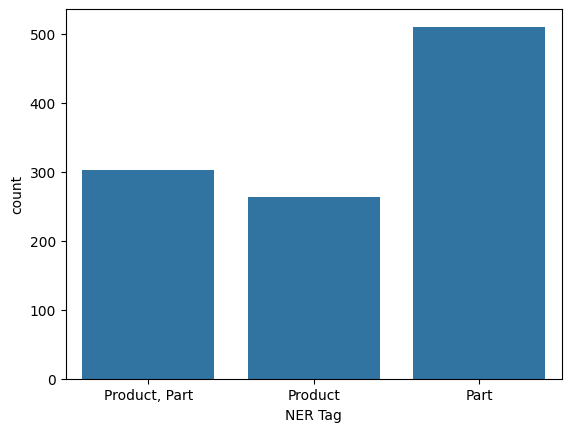

In [ ]:
sns.countplot(df_clean, x=df_clean['NER Tag'])

In [ ]:
df_clean['Class'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

<Axes: xlabel='Class', ylabel='count'>

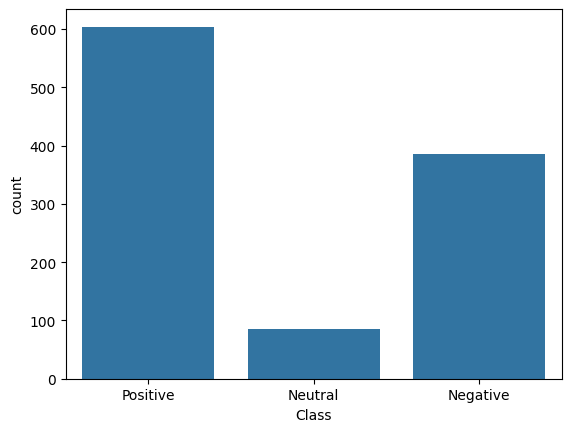

In [ ]:
sns.countplot(df_clean, x=df_clean['Class'])

array([[<Axes: title={'center': 'Symbols Count'}>,
        <Axes: title={'center': 'Emoji Count'}>],
       [<Axes: title={'center': 'NER_Tag_encoded'}>,
        <Axes: title={'center': 'Class_encoded'}>]], dtype=object)

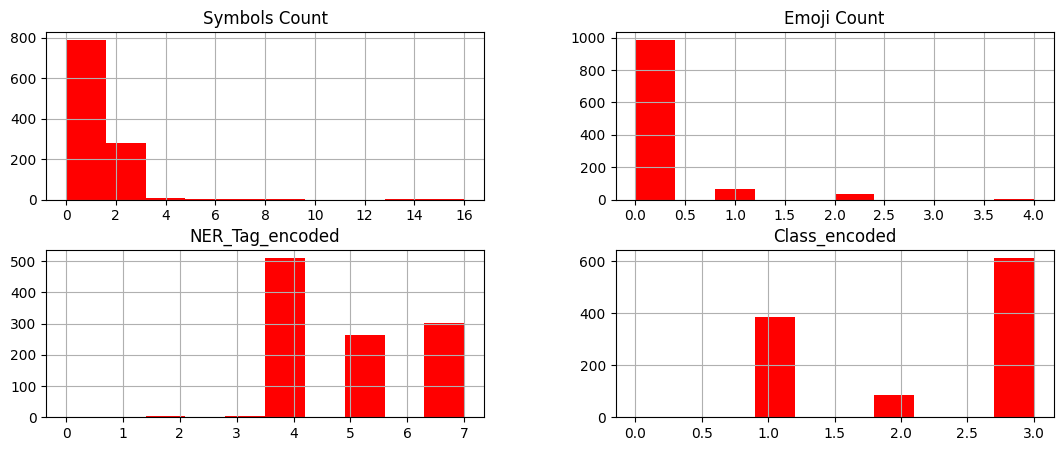

In [ ]:
# show the distribution of class in the df_clean
df_clean.hist(bins = 10, figsize = (13,5), color = 'r')

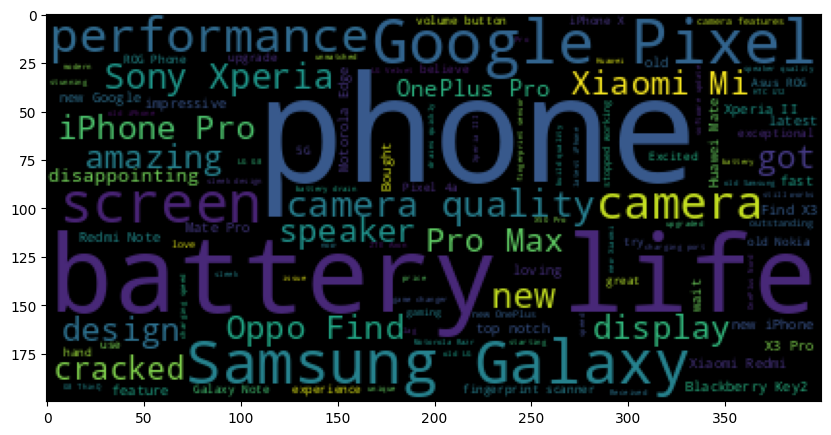

In [ ]:
# plot the wordcloud
sentences = df_clean['Sentence'].tolist()
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentences_as_one_string))

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [ ]:
X=df_clean['Sentence']
y_class=df_clean['Class_encoded']
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, stratify=y_class, test_size=0.2, random_state=42)

In [ ]:
df_clean.Sentence.values

array(['Bought a Huawei P30 Pro and found the camera terrific.',
       'My friend plans to fix his old Huawei P20 phone.',
       'Mic of that phone easily goes faulty.', ...,
       'The camera settings on the Vivo X50 Pro are confusing to navigate.',
       'The sound quality of the Huawei Mate 40 Pro is exceptional.',
       'The display brightness on the Samsung Galaxy A71 is too dim.'],
      dtype=object)

In [ ]:
X_train.shape

(860,)

In [ ]:
X_test.shape

(215,)

In [ ]:
y_class_train

,Class_encoded
921,0
239,2
1221,0
533,2
949,2
...,...
722,0
1130,2
809,2
667,0


In [ ]:
with tf.device('/cpu:0'):
    # Each sample from X_train is paired with the corresponding label in y_class_train
    train_data = tf.data.Dataset.from_tensor_slices((X_train.values, y_class_train.values))
    valid_data = tf.data.Dataset.from_tensor_slices((X_test.values, y_class_test.values))


    for text, label in train_data.take(5):
        # print(f'{text}:{label}')
        print(text)
        print(label)


tf.Tensor(b'The screen on my Samsung Galaxy S10+ cracked after a small fall.', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'Battery life and how quickly it charges - amazing. Fingerprint scanner - amazing.', shape=(), dtype=string)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(b'I dropped my Oppo Reno 4 and now the screen is cracked.', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'The new iPhone 12 Pro Max has an amazing camera! \xf0\x9f\x93\xb7\xf0\x9f\x94\xa5', shape=(), dtype=string)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(b"Pre-ordered the upcoming Huawei Mate 40 Pro. Can't wait to try out the new features.", shape=(), dtype=string)
tf.Tensor(2, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [ ]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""
# Label categories
label_list = [0, 1, 2]
 # maximum length of (token) input sequences
max_seq_length = 128
train_batch_size = 3

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
# L-12: indicates that this BERT model has 12 layers of Transformer Encoder.
# H-768: indicates that the output dimension of each layer is 768.
# A-12: indicates that each layer has 12 Attention heads.
# The model cased cased that the model is case-insensitive, meaning that the text is case-insensitive when it is input.
# trainable=True: The parameters of the pre-trained BERT model are further fine-tuned.
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2", trainable=True)


# This retrieves the file path to BERT's vocabulary file, which contains the list of tokens and their corresponding IDs.
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
# Retrieves whether the tokenizer should lowercase the input text (which is the case here, as the model is uncased).
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
# The word divider uses the loaded vocabulary file vocab_file and processes the text according to the do_lower_case rule.
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)


In [ ]:
tokenizer.wordpiece_tokenizer.tokenize('God, bless me to pass the interview. I want to return to my hometown for a holiday.')

['[UNK]',
 'bless',
 'me',
 'to',
 'pass',
 'the',
 'interview',
 '##.',
 '[UNK]',
 'want',
 'to',
 'return',
 'to',
 'my',
 'hometown',
 'for',
 'a',
 'holiday',
 '##.']

In [ ]:
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('God, bless me to pass the interview. I want to return to my hometown for a holiday.'))


[100,
 19994,
 2033,
 2000,
 3413,
 1996,
 4357,
 29625,
 100,
 2215,
 2000,
 2709,
 2000,
 2026,
 9627,
 2005,
 1037,
 6209,
 29625]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [ ]:
# This provides a function to convert row to input features and label
# text: The input sentence or piece of text to be tokenized.
# label: The corresponding label for the text (this could be one of the classes like 0, 1, or 2
# tokenizer=tokenizer: The BERT tokenizer used to convert the text into tokens that the model can process.
def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  # text_a=text.numpy(): The primary text input. The numpy() method converts the TensorFlow text tensor into a NumPy array so it can be used in the BERT processing.
  # text_b=None: BERT can handle two text inputs (e.g., for question-answering tasks)
  # label=label.numpy(): The corresponding label for the input text, also converted into a NumPy array using .numpy()
  example = classifier_data_lib.InputExample(guid = None,
                                            text_a = text.numpy(),
                                            text_b = None,
                                            label = label.numpy())
  # 0: This is usually the index for the example but isn't relevant here.
  # example: The InputExample created in the previous step.
  # label_list: The list of possible label categories, used to map labels correctly.

  feature = classifier_data_lib.convert_single_example(0, example, label_list,
                                    max_seq_length, tokenizer)
  # input_ids: The tokenized representation of the input text.
  # input_mask: A mask indicating which tokens are real and which are padding.
  # segment_ids: Token type IDs, used to distinguish between the two inputs in tasks with two sentences
  # label_id: The corresponding label of the input text converted into an integer.
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [ ]:
# converting the input text and label into a feature map that the BERT model can understand.
# text: The input text (e.g., a product review or a sentence).
# label: The corresponding classification label for the text (e.g., 0 for negative, 1 for positive).
def to_feature_map(text, label):
  # to_feature: This is the function that converts the input text and label into BERT’s required format (input_ids, input_mask, segment_ids, and label_id)
  # inp=[text, label]: These are the inputs to to_feature: the text and its corresponding label.
  # all returned values (input_ids, input_mask, segment_ids, and label_id) are 32-bit integers.
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label],
                                Tout=[tf.int32, tf.int32, tf.int32, tf.int32])

  # py_func doesn't set the shape of the returned tensors.
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  # label_id.set_shape([]): The label_id is a scalar (a single value) representing the label, so no shape is needed other than [].
  label_id.set_shape([])

  x = {
        'input_word_ids': input_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
    }
  # print( x, label_id)
  return (x, label_id)



## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [ ]:
# all operations inside the block are executed on the CPU
with tf.device('/cpu:0'):
  # train
  # map(to_feature_map): Applies the to_feature_map function to every element in the train_data dataset.
  # num_parallel_calls=tf.data.experimental.AUTOTUNE: This allows TensorFlow to decide the number of threads to use for parallel processing automatically.
  # batch(10): Groups the dataset into batches of 10 samples.
  # prefetch(): Allows the data pipeline to fetch the next batch of data while the current one is being processed, overlapping preprocessing and model training.
  train_data = (train_data.map(to_feature_map,
                              num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          #.cache()
                          .shuffle(100)
                          .batch(10, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))

  # valid
  valid_data = (valid_data.map(to_feature_map,
                            num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          .batch(10, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))



TypeError: in user code:

    File "<ipython-input-41-72421747bafa>", line 8, in to_feature_map  *
        input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label],

    TypeError: Tensors in list passed to 'input' of 'EagerPyFunc' Op have types [<NOT CONVERTIBLE TO TENSOR>, int32] that are invalid. Tensors: [{'input_word_ids': <tf.Tensor 'args_2:0' shape=(10, 128) dtype=int32>, 'input_mask': <tf.Tensor 'args_0:0' shape=(10, 128) dtype=int32>, 'input_type_ids': <tf.Tensor 'args_1:0' shape=(10, 128) dtype=int32>}, <tf.Tensor 'args_3:0' shape=(10,) dtype=int32>]


The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [ ]:
# train data spec
train_data.element_spec

({'input_word_ids': TensorSpec(shape=(10, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(10, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(10, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(10,), dtype=tf.int32, name=None))

In [ ]:
# valid data spec
valid_data.element_spec

({'input_word_ids': TensorSpec(shape=(10, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(10, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(10, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(10,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [ ]:
# Building the model
def create_model():
  # The tokenized text (i.e., the sequence of token IDs).
  print(f'start')
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                      name="input_word_ids")
  print(f'the input_word_ids is {input_word_ids}')
  # A mask that indicates which tokens are real and which are padding (1 for real tokens, 0 for padding)
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_mask")
  # Segment IDs that differentiate between different parts of the input (in tasks with two sentences, these segment the input into sentence 1 and sentence 2)
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_type_ids")
  # pooled_output: Represents the entire input sequence as a single embedding.
  # sequence_output: The embedding for each token in the input sequence
  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])
  # 40% (0.4) of the neurons will be dropped.
  drop = tf.keras.layers.Dropout(0.4)(pooled_output)
  output = tf.keras.layers.Dense(3, activation="softmax", name="output")(drop)

  model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids
    },
    outputs=output)
  return model




## Task 10: Fine-Tune BERT for Text Classification

In [ ]:
model = create_model()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.summary()


start
the input_word_ids is <KerasTensor shape=(None, 128), dtype=int32, sparse=None, name=input_word_ids>


ValueError: Exception encountered when calling layer 'keras_layer_1' (type KerasLayer).

A KerasTensor is symbolic: it's a placeholder for a shape an a dtype. It doesn't have any actual numerical value. You cannot convert it to a NumPy array.

Call arguments received by layer 'keras_layer_1' (type KerasLayer):
  • inputs=['<KerasTensor shape=(None, 128), dtype=int32, sparse=None, name=input_word_ids>', '<KerasTensor shape=(None, 128), dtype=int32, sparse=None, name=input_mask>', '<KerasTensor shape=(None, 128), dtype=int32, sparse=None, name=input_type_ids>']
  • training=None

In [ ]:
# Train model
epochs = 4
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1)


## Task 11: Evaluate the BERT Text Classification Model

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()